1. Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import datetime
sns.set_theme()
from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2. Importing Dataset and first look - The first work was at Kaggle, please refer to kaggle.com to obtain the same dataset

In [2]:
#df = pd.read_csv(r'/kaggle/input/laptop-prices/laptop_prices.csv',
#                encoding = 'UTF-8',
#                sep = ',')

df = pd.read_csv(r'C:\Users\asus\OneDrive\Data Scientist\Datasets\laptop_prices.csv',
                 encoding= 'UTF-8',
                 sep=','
                )

In [3]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.0,Full HD,1920,1080,Yes,Yes,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.0,Quad HD+,3200,1800,Yes,Yes,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.0,Standard,1366,768,No,No,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,4,Windows 10,2.20,369.0,Standard,1366,768,No,No,No,Intel,1.6,Celeron Dual Core N3050,500,0,HDD,No,Intel,HD Graphics


In [5]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


3.EDA

In [6]:
df_pt = pd.pivot_table(data=df,
               values='Price_euros',
               index=['Company'],
               #columns=['Season'],
               aggfunc= sum,
               sort= True).reset_index()
df_pt = df_pt.sort_values(by='Price_euros',ascending=False)
df_pt= df_pt.iloc[0:10, :]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dell'),
  Text(1, 0, 'Lenovo'),
  Text(2, 0, 'HP'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'MSI'),
  Text(5, 0, 'Acer'),
  Text(6, 0, 'Toshiba'),
  Text(7, 0, 'Apple'),
  Text(8, 0, 'Razer'),
  Text(9, 0, 'Samsung')])

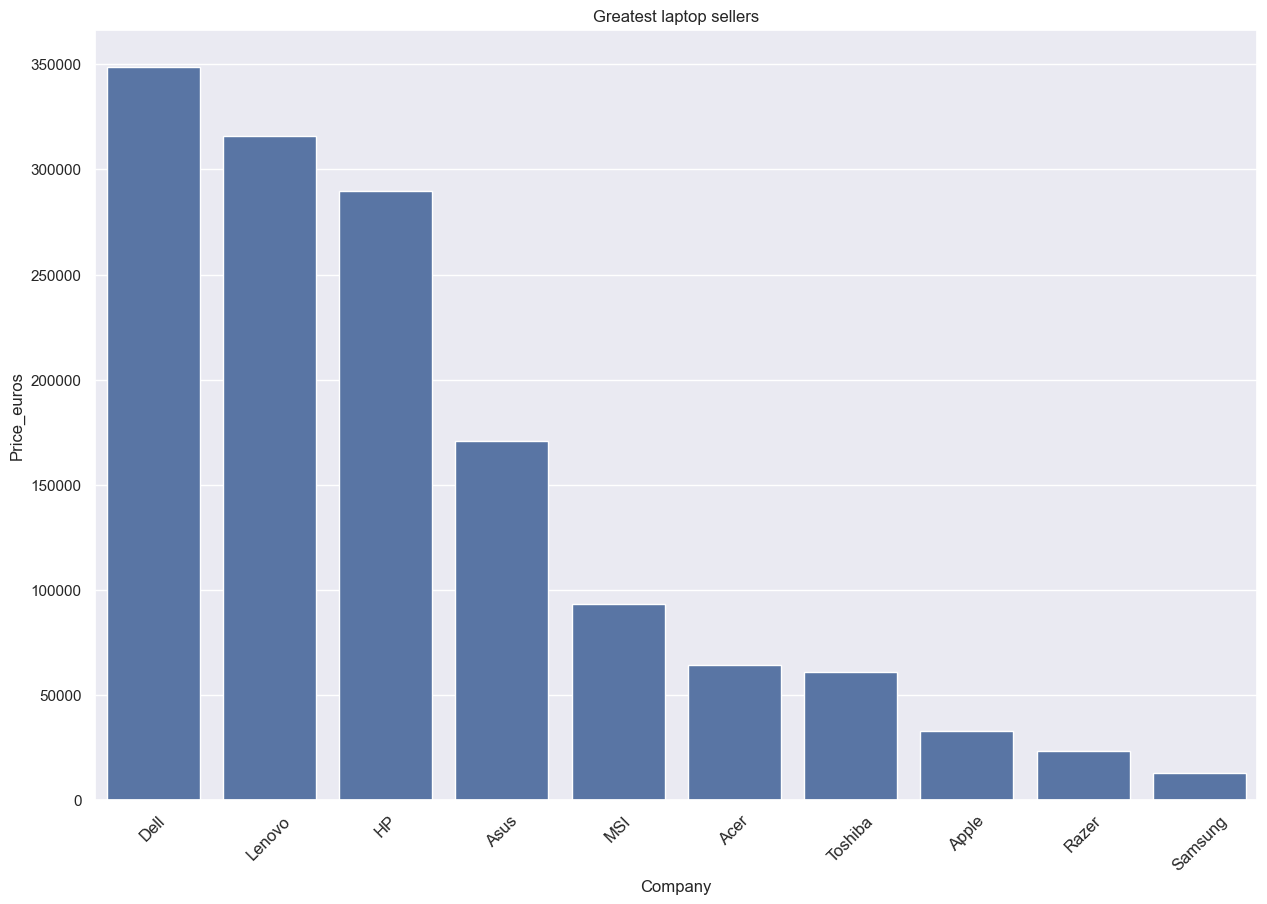

In [7]:
plt.figure(figsize=(15,10))
plt.title('Greatest laptop sellers')
sns.barplot(data=df_pt,
            x='Company',
            y= 'Price_euros')
plt.xticks(fontsize = 12, rotation= 45)

In [8]:
df_pt = pd.pivot_table(data=df,
               values='Price_euros',
               index=['Company'],
               #columns=['Season'],
               aggfunc= 'mean',
               sort= True).reset_index()
df_pt = df_pt.sort_values(by='Price_euros',ascending=False)
df_pt= df_pt.iloc[0:10, :]

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

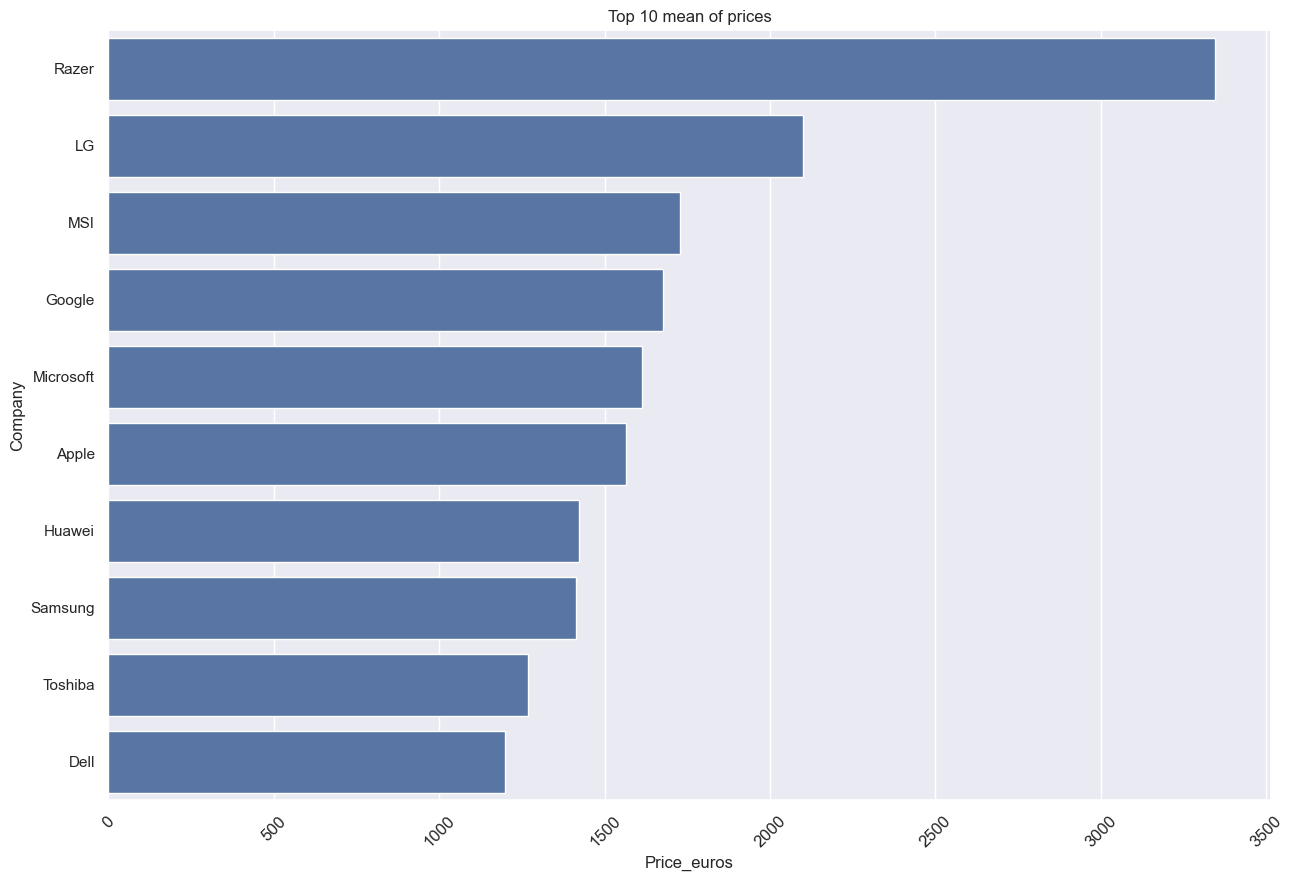

In [9]:
plt.figure(figsize=(15,10))
plt.title('Top 10 mean of prices')
sns.barplot(data=df_pt,
            x='Price_euros',
            y= 'Company')
plt.xticks(fontsize = 12, rotation= 45)

In [10]:
df_pt = pd.pivot_table(data=df,
               values='Price_euros',
               index=['Company'],
               #columns=['Season'],
               aggfunc= 'max',
               sort= True).reset_index()
df_pt = df_pt.sort_values(by='Price_euros',ascending=False)
df_pt= df_pt.iloc[0:10, :]

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

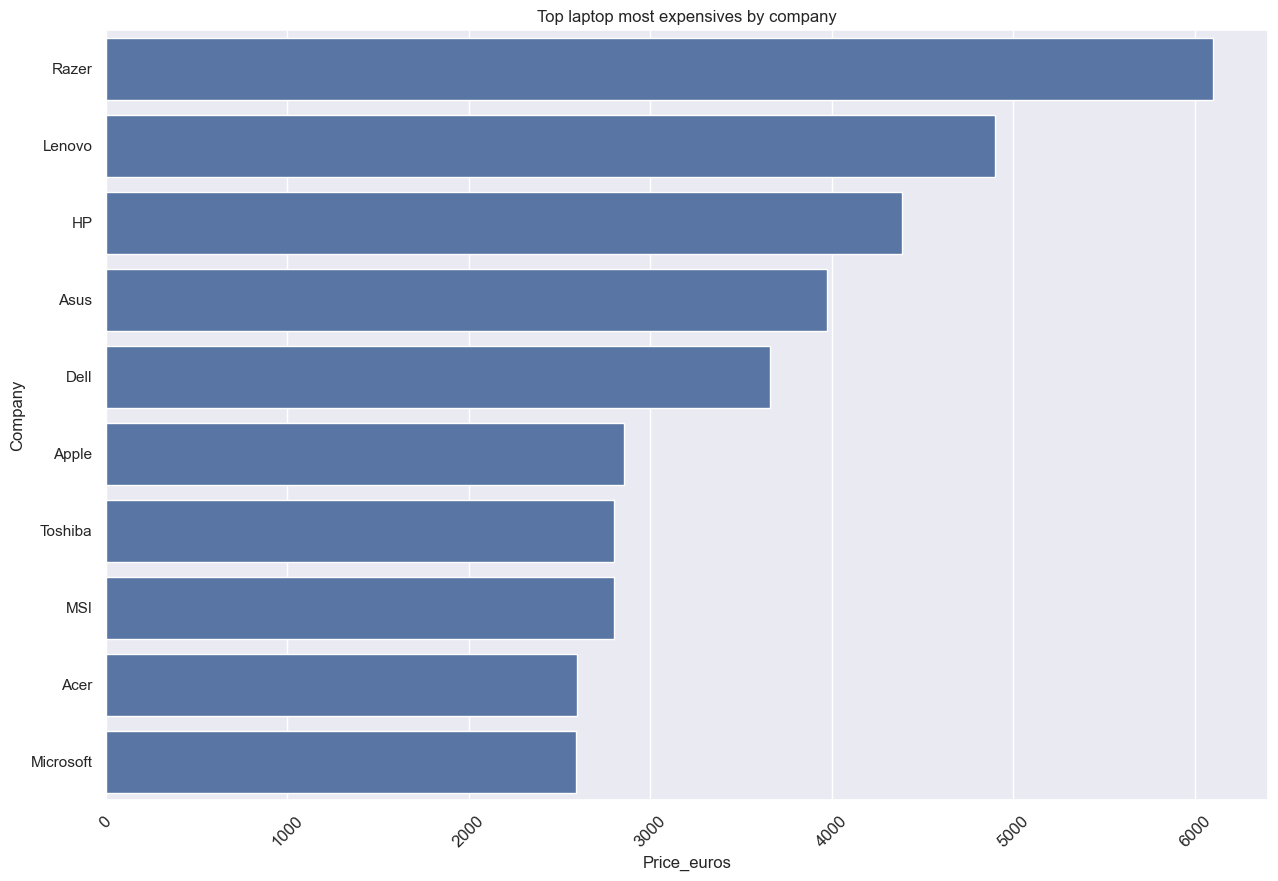

In [11]:
plt.figure(figsize=(15,10))
plt.title('Top laptop most expensives by company')
sns.barplot(data=df_pt,
            x='Price_euros',
            y= 'Company')
plt.xticks(fontsize = 12, rotation= 45)

<Axes: title={'center': 'Relationship between inches and weight'}, xlabel='Inches', ylabel='Weight'>

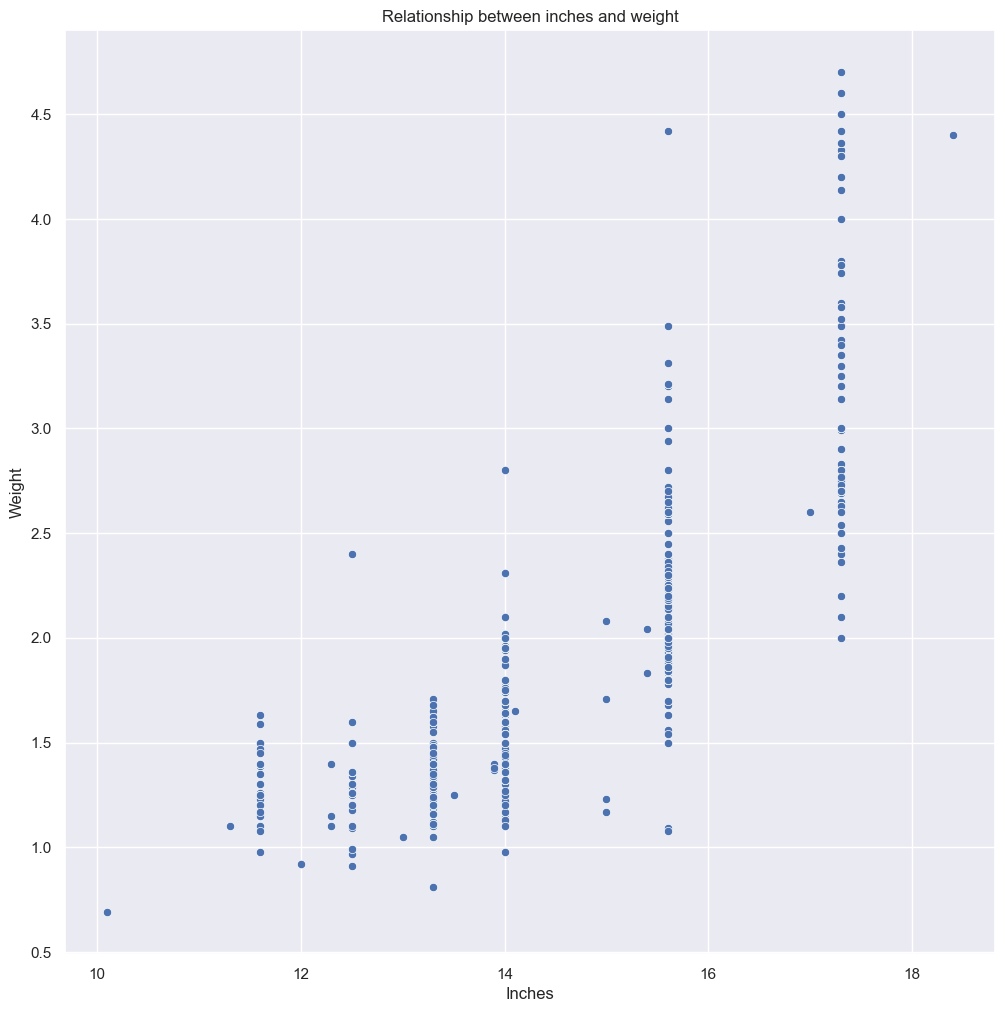

In [12]:
plt.figure(figsize=(12,12))
plt.title('Relationship between inches and weight')
sns.scatterplot(data=df,
               x='Inches',
               y='Weight')

<Axes: title={'center': 'Relationship between Ram and Price'}, xlabel='Ram', ylabel='Price_euros'>

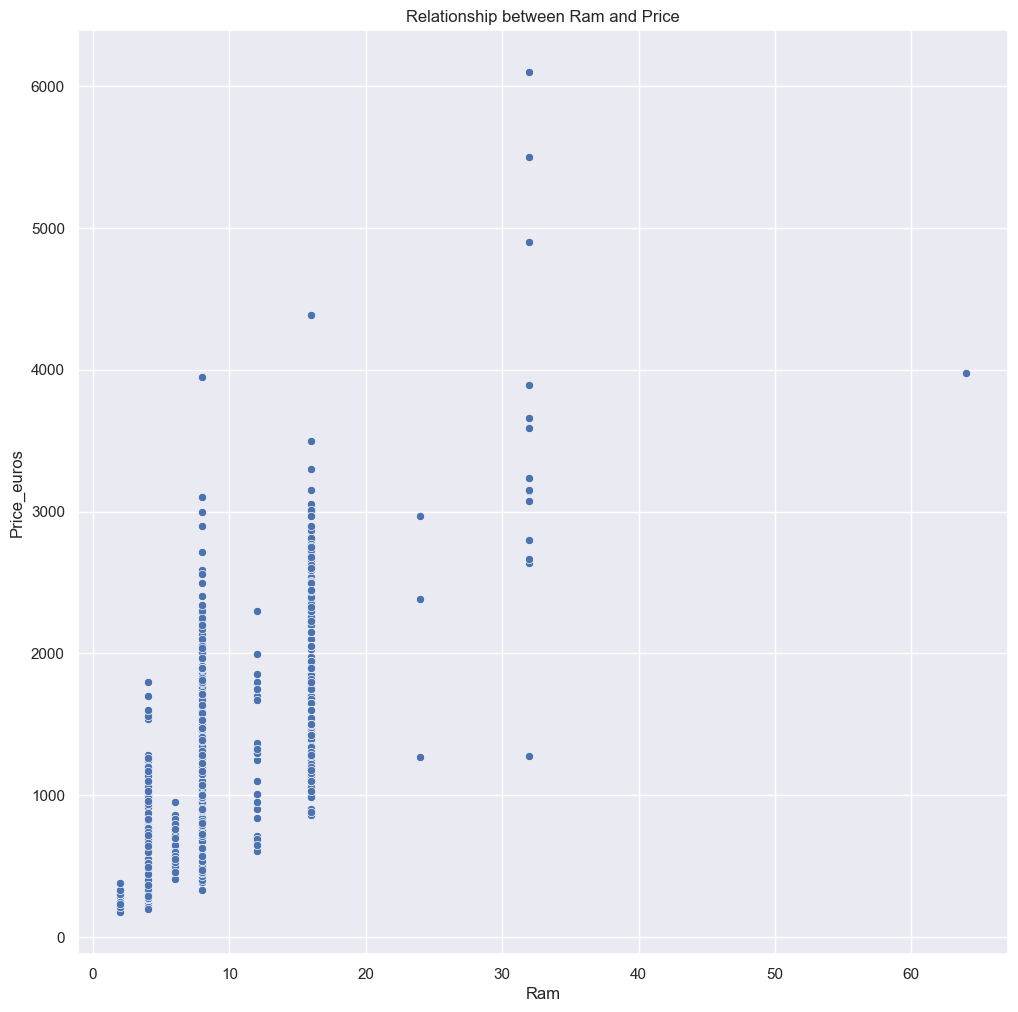

In [13]:
plt.figure(figsize=(12,12))
plt.title('Relationship between Ram and Price')
sns.scatterplot(data=df,
               x='Ram',
               y='Price_euros')

<Axes: title={'center': 'Relationship between CPU Capacity and Price'}, xlabel='CPU_freq', ylabel='Price_euros'>

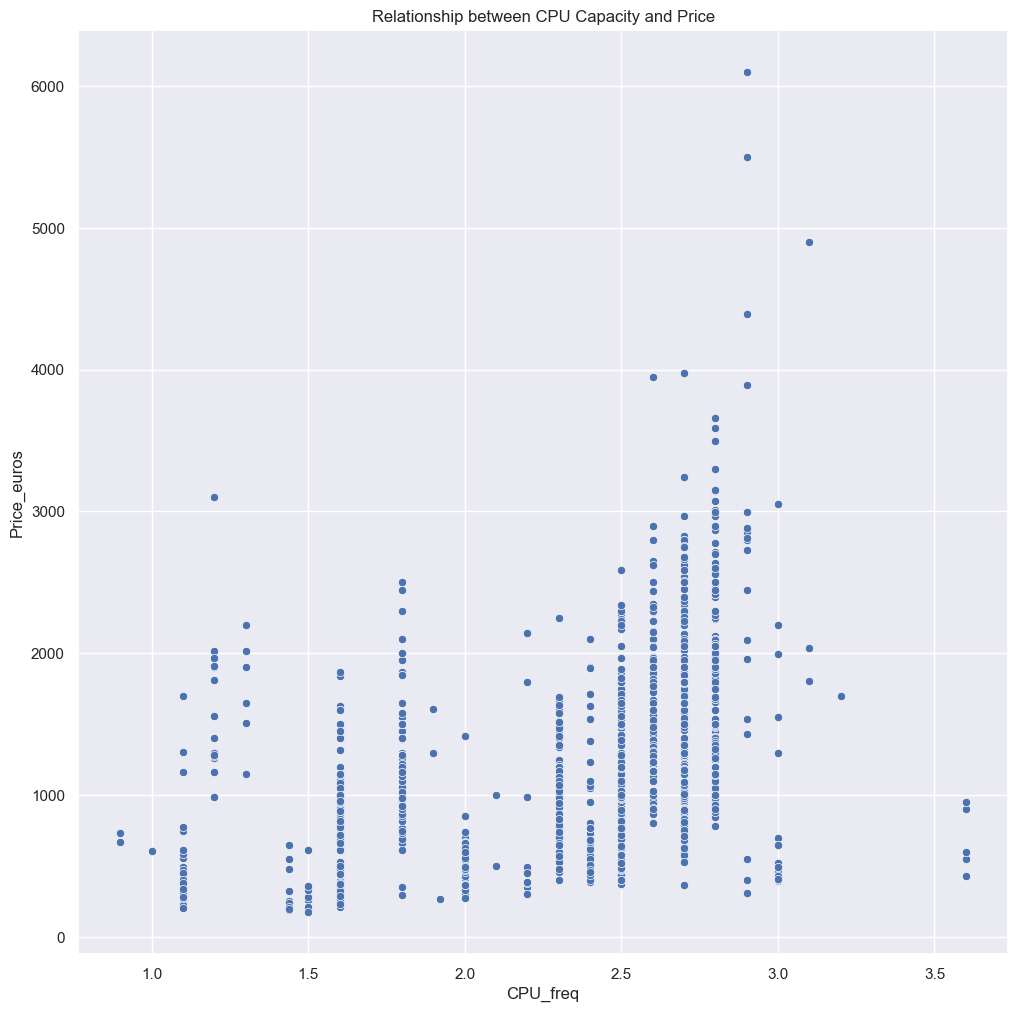

In [14]:
plt.figure(figsize=(12,12))
plt.title('Relationship between CPU Capacity and Price')
sns.scatterplot(data=df,
               x='CPU_freq',
               y='Price_euros')

<Axes: title={'center': 'Relationship between CPU and Ram'}, xlabel='CPU_freq', ylabel='Ram'>

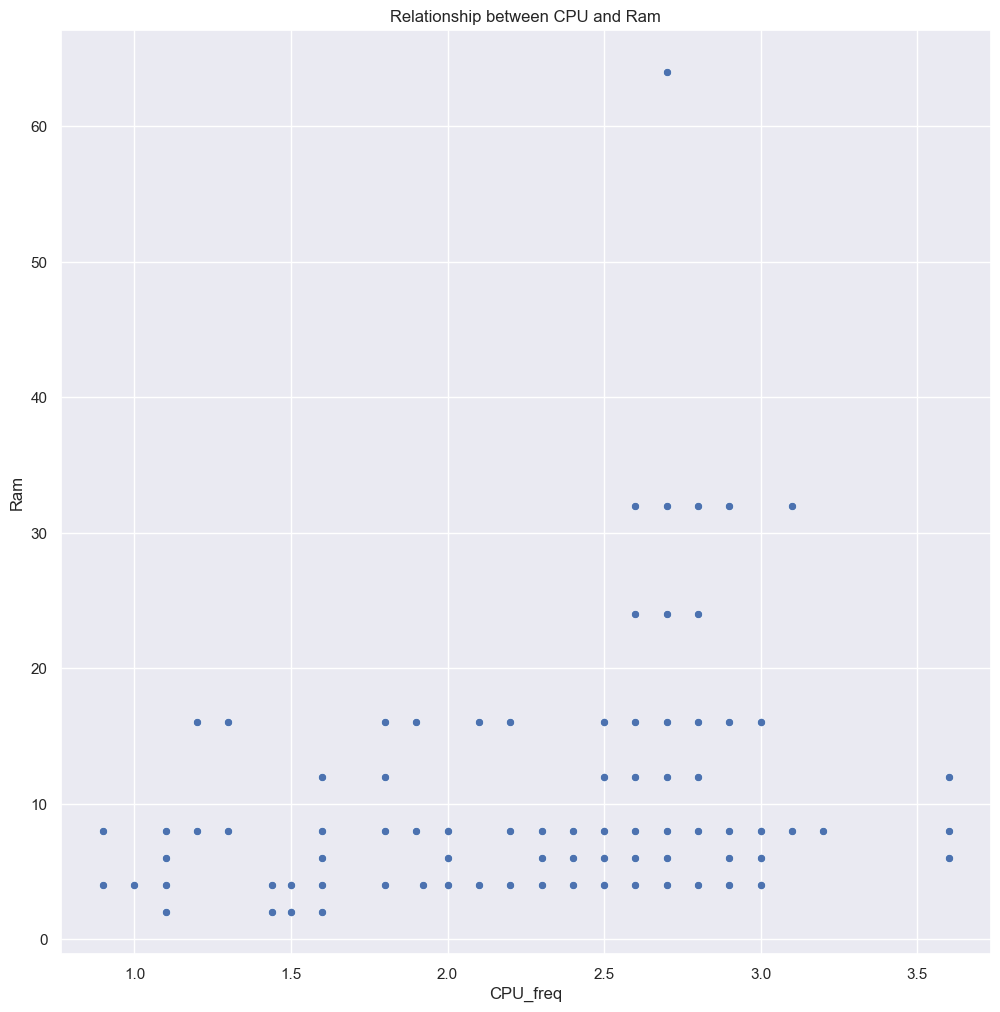

In [15]:
plt.figure(figsize=(12,12))
plt.title('Relationship between CPU and Ram')
sns.scatterplot(data=df,
               x='CPU_freq',
               y='Ram')

<Axes: title={'center': 'Relationship between Primary Storage and Price'}, xlabel='PrimaryStorage', ylabel='Price_euros'>

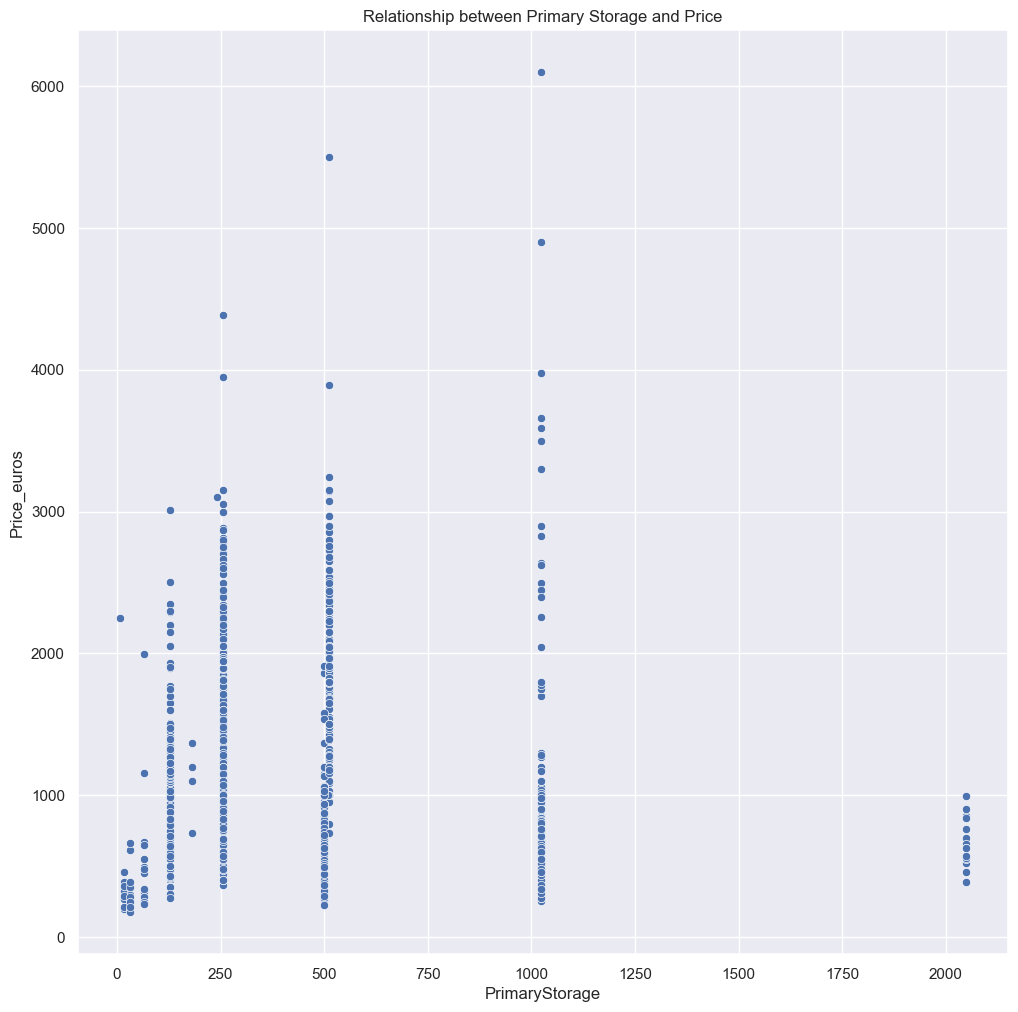

In [16]:
plt.figure(figsize=(12,12))
plt.title('Relationship between Primary Storage and Price')
sns.scatterplot(data=df,
               x='PrimaryStorage',
               y='Price_euros')

In [17]:
x = df.copy()

3.1 This a step for Data encoding to use some labels as input in the model

In [18]:
for col in x.select_dtypes(include=['object']).columns:

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(x[col].unique())

    x[col] = label_encoder.transform(x[col])

    print(f"{col}: {x[col].unique()}")

Company: [ 1  7  0  2  4 10  3 11 13 16  8 18 17 14 12 15  6  5  9]
Product: [300 301  50  58 608 430 239 298 209 576 543 291  51 244   8 299 247 282
 364 270 104  44 200 252 363 554 258 565  63 260 211 408 574 592 361 240
  16 538 181 562 550 220 500 601 428 524 142 429 242 163  69 133 210  64
 362 207 326 134 135  59 368 616 423 563 314  21  29 124 323 228 501 167
 486 541 474 369 421 257 572 422 178 371 103 245  65   7 504 140 123 455
 411 607 113 555 152  62 248 256 505 155 111   9 583 600 250 569  67  61
 149 302  47 190 518 591 303 577 431 494 264 213  85 317 511  71 292 352
  60 384  22 212 280 341  56 545 266 594 359  38 549  79 570 381 307 539
 129 590  20 387 382 552 548  13 125 187 586 547 531 472 214 230 409 490
  97 139  40 530  68 353 202 610 540 402 157 208 114 222 150 107 536 453
 365 495 117 606  70 116 164 502 521 137 118 556 238 206 427 171 597 440
 285 615   3 115 199  31 578 535 321 520 385 223 612 491 233 349 351 404
 407 294  10 457 459 354 141 156 611 342 293 46

3.2 This is a way to make quick segmentation, first we tried with 3 segments, but as per the WCSS curve it is better to use 4 clusters

In [19]:
x = x[['Product','Price_euros','Screen','Touchscreen','Ram','OS','CPU_freq',
       'PrimaryStorage','SecondaryStorage','Inches']]

In [20]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
clusters = x.copy()
clusters['Clusts']= kmeans.fit_predict(x)

In [22]:
clusters.columns.unique()

Index(['Product', 'Price_euros', 'Screen', 'Touchscreen', 'Ram', 'OS',
       'CPU_freq', 'PrimaryStorage', 'SecondaryStorage', 'Inches', 'Clusts'],
      dtype='object')

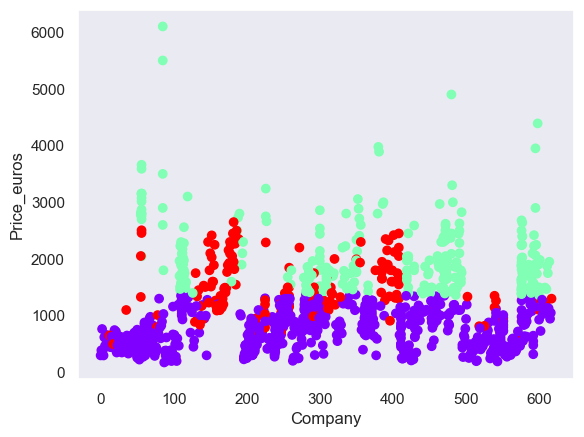

In [23]:
plt.scatter(clusters['Product'],
            clusters['Price_euros'],
            c=clusters['Clusts'],
           cmap='rainbow')
plt.xlabel('Company')
plt.ylabel('Price_euros')
plt.grid()

In [24]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.04287014,  0.29225906,  1.51739999, ..., -0.86623575,
        -0.42344896, -1.20574632],
       [-0.03702546, -0.33695445,  1.51739999, ..., -0.86623575,
        -0.42344896, -1.20574632],
       [-1.50403954, -0.79941032, -0.60048177, ..., -0.51592929,
        -0.42344896,  0.40387315],
       ...,
       [-0.65071661, -1.29335899,  1.51739999, ..., -1.04138897,
        -0.42344896, -0.71586214],
       [-1.78458406, -0.52959443,  1.51739999, ...,  1.58590945,
        -0.42344896,  0.40387315],
       [ 1.52350346, -1.09349537,  1.51739999, ...,  0.15184239,
        -0.42344896,  0.40387315]])

In [25]:
wcss = []

for i in range (1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[12749.999999999998,
 10527.822230173124,
 8998.327086483061,
 7896.070164530711,
 7138.963245983471,
 6535.394487216742,
 6054.026751244151,
 5705.0813560372835,
 5412.830234043277]

Text(0, 0.5, 'WCSS')

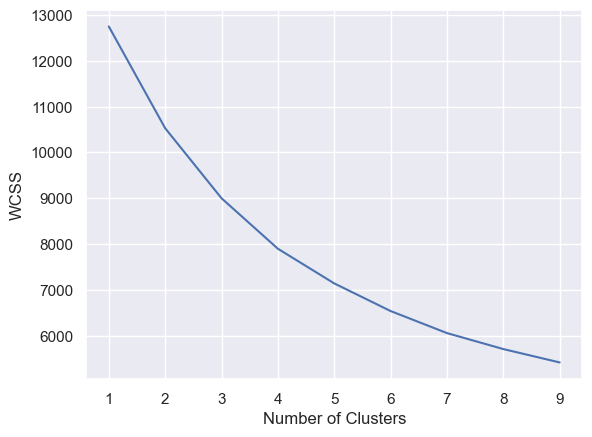

In [26]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [27]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [28]:
clusters = x.copy()
clusters['Clusts']= kmeans.fit_predict(x)

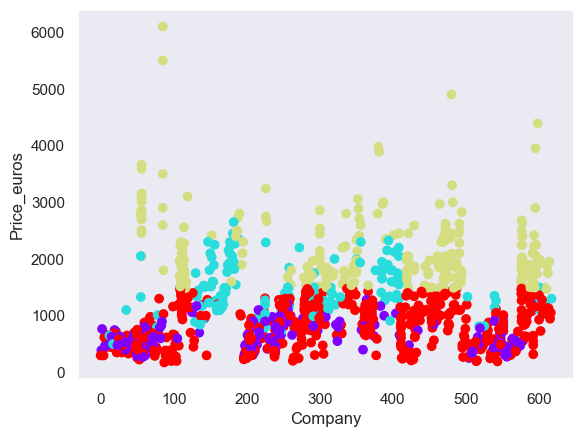

In [29]:
plt.scatter(clusters['Product'],
            clusters['Price_euros'],
            c=clusters['Clusts'],
           cmap='rainbow')
plt.xlabel('Company')
plt.ylabel('Price_euros')
plt.grid()

In [30]:
df.columns.unique()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

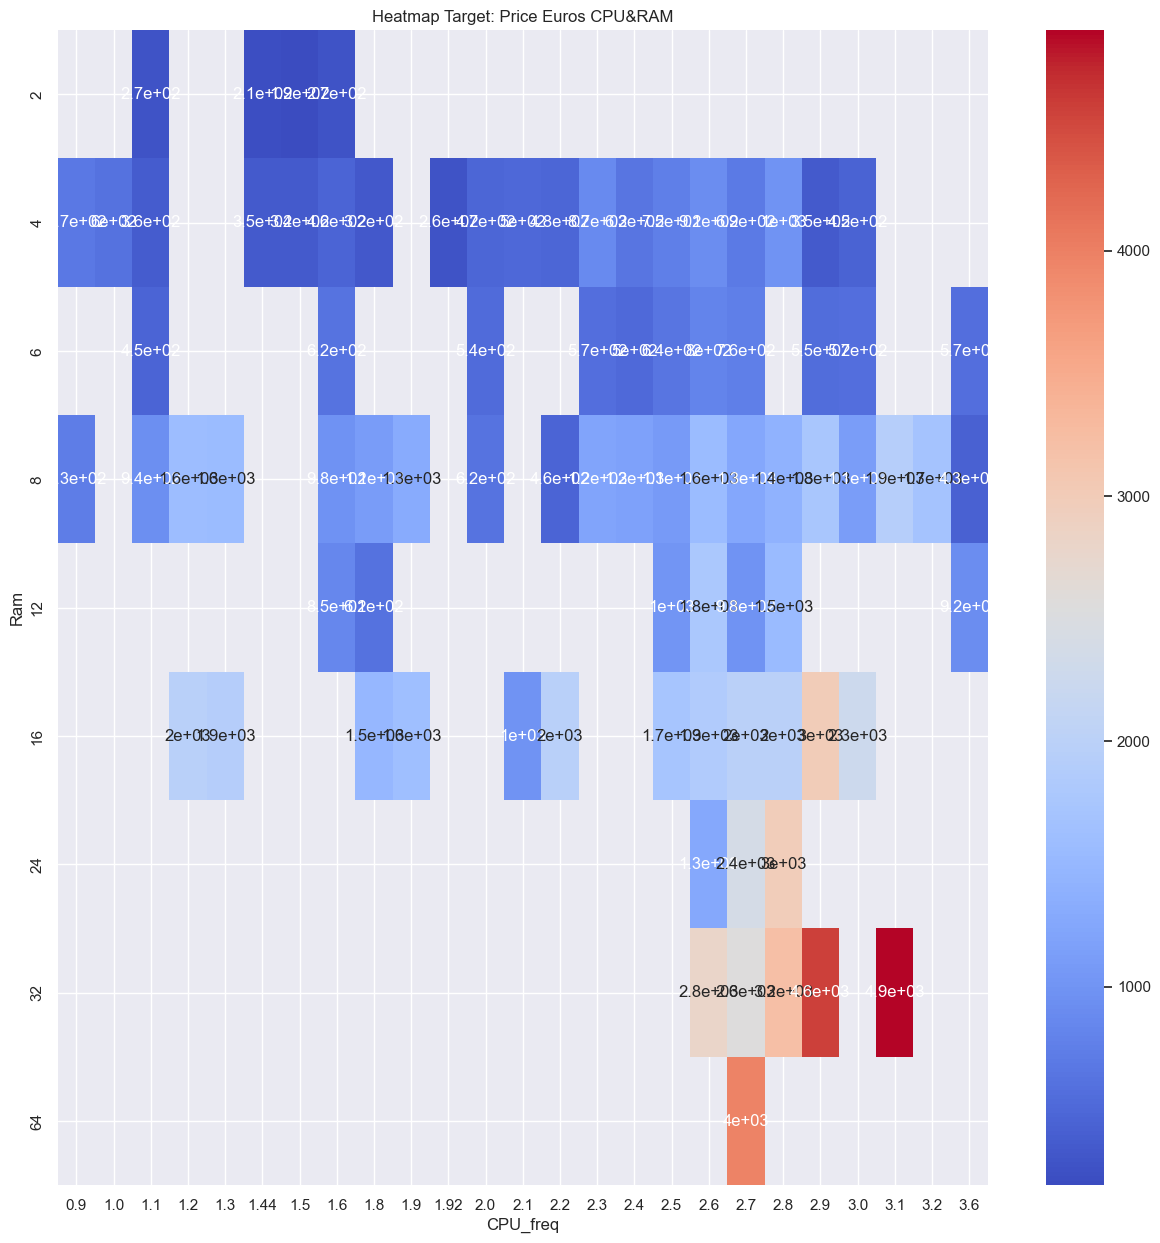

In [31]:
target_column = 'Price_euros'
def plot_heatmap(cat_feature1, cat_feature2):
    pivot_table = df.pivot_table(index=cat_feature1, 
                                 columns=cat_feature2, 
                                 values=target_column, 
                                 aggfunc=np.mean)
    plt.figure(figsize=(15,15))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
    plt.title('Heatmap Target: Price Euros CPU&RAM')
    plt.show()

cat_feature1 = 'Ram'
cat_feature2 = 'CPU_freq'
plot_heatmap(cat_feature1, cat_feature2)

In [32]:
df.columns.unique()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

4.Lets Practice some supervised and non supervised training

In [33]:
#df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [34]:
df_copy = df.copy()
####Randomizing

np.random.seed(5)
l = list(df_copy.index)
np.random.shuffle(l)
df_copy = df_copy.iloc[l]

In [35]:
for col in df_copy.select_dtypes(include=['object']).columns:

    label_encoder = preprocessing.LabelEncoder()

    label_encoder.fit(df_copy[col].unique())

    df_copy[col] = label_encoder.transform(df_copy[col])

    print(f"{col}: {df_copy[col].unique()}")

Company: [ 2  4 10  1  7 11 16  0 15 18 13  5  3 12  6 17 14  9  8]
Product: [392 547 211 300 538 539 592  26 610 419  15 150 244 110  32 551 476 554
 593 573 411 430 493 298  20 370 183 363 256 596 595 378 154 602 443 379
 612  56  73 309 240 472  37 474 391   4 583 203 250 123 308  70  57 288
 162 442 281 228 604 179 469  71 356 247 421 425 292 148 393  76 257 196
  12 497 408  50 212  63 440 218 386 208 303 291 239 204 112  10 109  44
 117 423 299 268 258 459 557 490  62 238 591 542 599 576  58 491 160 567
  40 333  88 451  14 485 376 172 553 119 173 164 282 322 588 261 404 245
 128 320  30 290 590 371 178 328 337 471 388 358 429 187 372 483 149 138
 350 182 445  83 297 158 531 449 111 504 594 366 541 171 375 200  95 252
  45 562 369 461 580 114 259 351 368 269 346   6 453 301 415 121 230 229
 242 571 365 478 460 331 279  74 385 492 233 577 210  59 529 600 287 156
 540 327 514 533 344 609 295  39 221 477 262 511  43 285 484  79 215 315
 377 582 206 137 219 342 420 326  85   5 564 19

4.1 Linear Regression Model

In [36]:
#Excluded Variables: IPSPannel, SecondaryStorage, 'SecondaryStorageType', 'ScreenW', 'ScreenH', 'CPU_company', Product , 'PrimaryStorageType',
#        'GPU_company', 'GPU_model','Screen',  'Touchscreen','Company', 'TypeName', 'RetinaDisplay', 

y = df_copy[['Price_euros']]
x = df_copy[['Inches', 'Ram', 'OS', 'Weight',
       'GPU_model',
       'CPU_freq', 'CPU_model',
       'PrimaryStorage']]

In [37]:
import statsmodels.api as sm
x = sm.add_constant(x)
reg_Simp = sm.OLS(y,x)
result_Simp = reg_Simp.fit()

In [38]:
result_Simp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     310.4
Date:                Sat, 31 May 2025   Prob (F-statistic):          4.14e-292
Time:                        11:54:10   Log-Likelihood:                -9470.5
No. Observations:                1275   AIC:                         1.896e+04
Df Residuals:                    1266   BIC:                         1.901e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            403.1748    179.682      2.244      0.025      50.667     755.682
Inches           -97.2351     14.938     -6.509      0.000    -126.541     -67.930
Ram               82.5707      2.789     29.607      0.000      77.099      88.042
OS                98.8484     11.497      8.598      0.000      76.294     121.403
Weight            62.7055     33.002      1.900      0.058      -2.039     127.450
GPU_model          0.1543      0.459      0.336      0.737      -0.747       1.055
CPU_freq         258.2164     25.900      9.970      0.000     207.405     309.028
CPU_model          7.3998      0.756      9.784      0.000       5.916       8.884
PrimaryStorage    -0.1857      0.033     -5.659      0.000      -0.250      -0.121
==============================================================================
Omnibus:                      399.870   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2476.823
Skew:                           1.306   Prob(JB):                         0.00
Kurtosis:                       9.308   Cond. No.                     9.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = mean_squared_error(ytest,ypred,squared=False)
    r2s = r2_score(ytest,ypred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

In [40]:
def model_res(model,x_train,x_test,y_train,y_test,y_pred,mname):
    train_r2=model.score(x_train,y_train)
    test_r2=model.score(x_test,y_test)
    w=eval_model(y_test,y_pred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                   'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname])
    return res, res_metrics

In [41]:
y = np.log(df_copy['Price_euros'])
X = df_copy[['Inches', 'Ram', 'OS', 'Weight',
       'GPU_model',
       'CPU_freq', 'CPU_model',
       'PrimaryStorage']]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, 
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 8)
(383, 8)
(892,)
(383,)


In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)


ypred_lr1 =  lr1.predict(X_test)

In [45]:
lr1_df,lr_res = model_res(lr1,X_train,X_test,y_train,y_test,ypred_lr1,'LinR')
lr1_df

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinR,0.695624,0.69732,0.114842,0.338883,0.262467


4.2 Internal and external Validation

In [46]:
y = df_copy[['Price_euros']]
X = df_copy[['Inches', 'Ram', 'OS', 'Weight',
       'GPU_model',
       'CPU_freq', 'CPU_model',
       'PrimaryStorage']]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, 
                                                    random_state=10)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
regrINT = linear_model.LinearRegression()
regrINT.fit(X,y)
prediccionesINT = regrINT.predict(X)
print("R2: ",r2_score(y,prediccionesINT))

regrEXT = linear_model.LinearRegression()
regrEXT.fit(X_train,y_train)
prediccionesEXT = regrINT.predict(X_test)
print("R2: ",r2_score(y_test,prediccionesEXT))

R2:  0.6623460597451336
R2:  0.670574166711922


In [49]:
df_copy.columns.unique()

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

4.3 Decision Tree Classifier

Important: This is obviusly a regression challenge, just wanted to make a classifier model to see if my hypotesis of regression challenge is true

In [50]:
df_copy_tree = df_copy[['Inches', 'Ram', 'OS', 'Weight',
       'GPU_model',
       'CPU_freq', 'CPU_model',
       'PrimaryStorage','Price_euros']]
df_copy_tree = df_copy_tree.rename(columns={'Price_euros':'y'})

In [51]:
df_copy_tree['y'] = df_copy_tree['y'].round()

In [52]:
X = df_copy_tree.drop('y',axis=1)
y = df_copy_tree['y']
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [1,2,3,4],
    'random_state': [0,42]
}

grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, 
                               min_samples_leaf=1,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

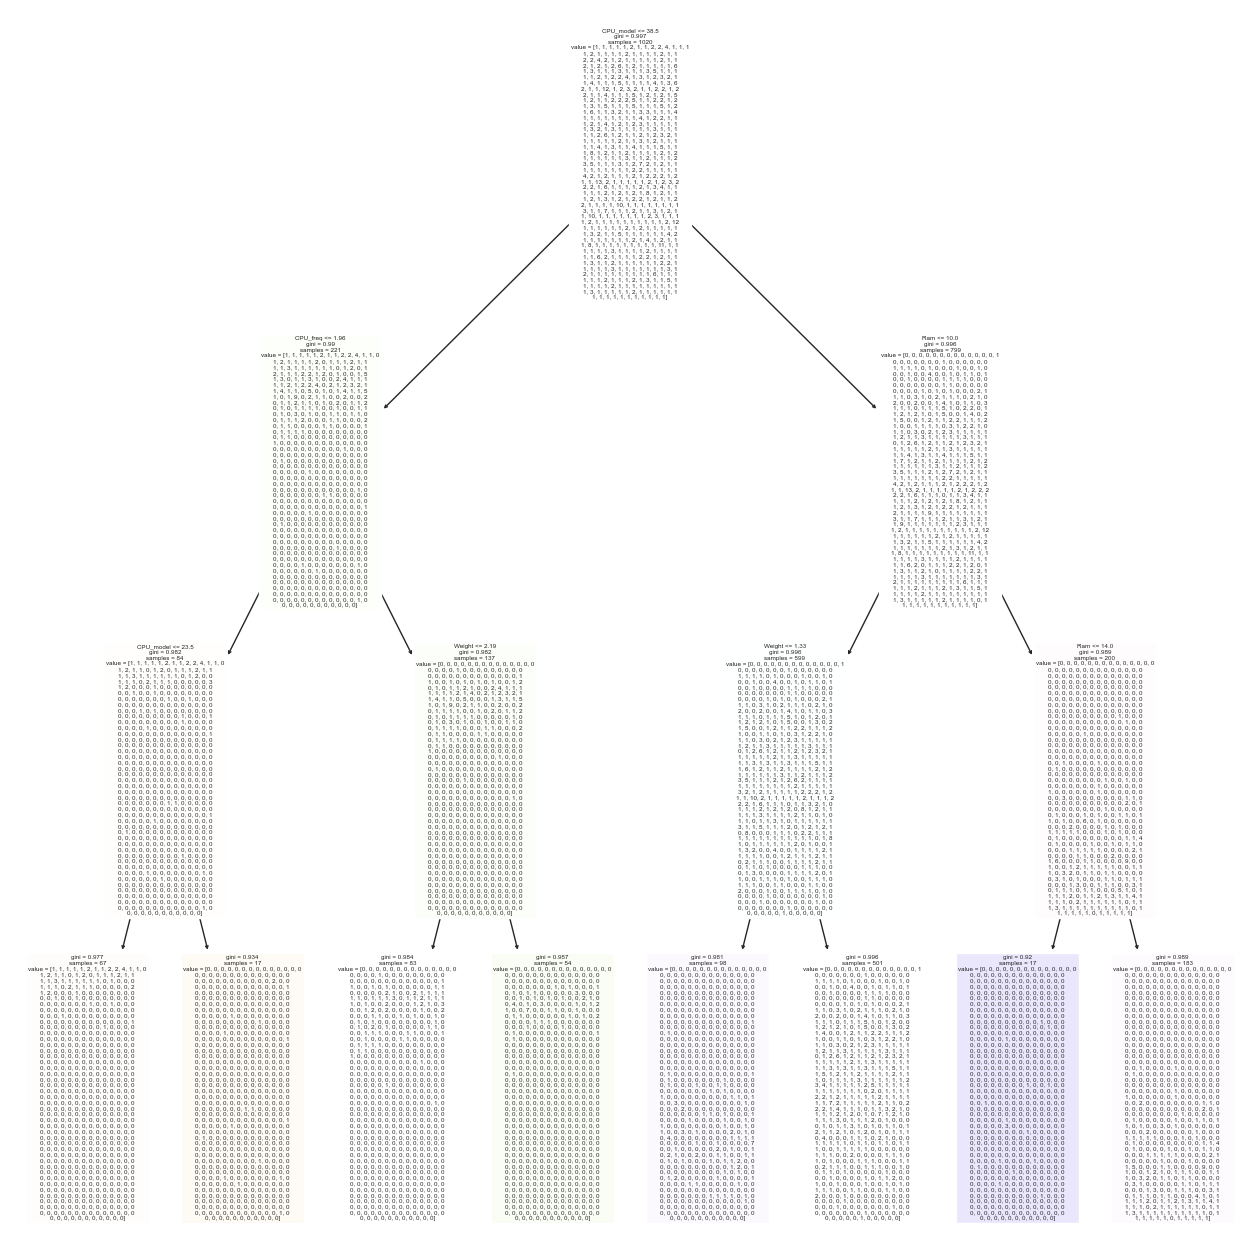

In [55]:
from sklearn.tree import plot_tree
## Árbol de clasificación
plt.figure(figsize=(16, 16))
plot_tree(dtree, max_depth = 3, filled = True, 
          feature_names = X_train.columns.values.tolist())
plt.show()

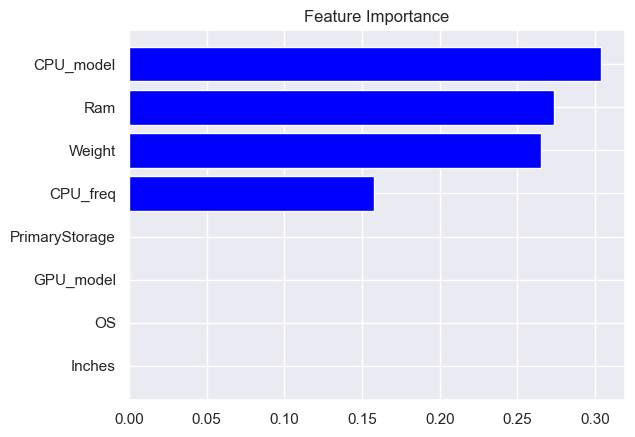

In [56]:
def get_feature_importance(model, n_features):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(n_features), feature_importance[sorted_idx][-n_features:], 
             align='center', color = 'blue')
    plt.yticks(range(n_features), np.array(model.feature_names_in_)[sorted_idx][-n_features:])
    plt.title('Feature Importance')
    plt.show()

get_feature_importance(dtree, 8)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
predictions_test = dtree.predict(X_test)
y_test
## Accuracy
accuracy = accuracy_score(y_test, predictions_test)
print(f'Exactitud del modelo en el conjunto de prueba: {accuracy:.2f}')

Exactitud del modelo en el conjunto de prueba: 0.01


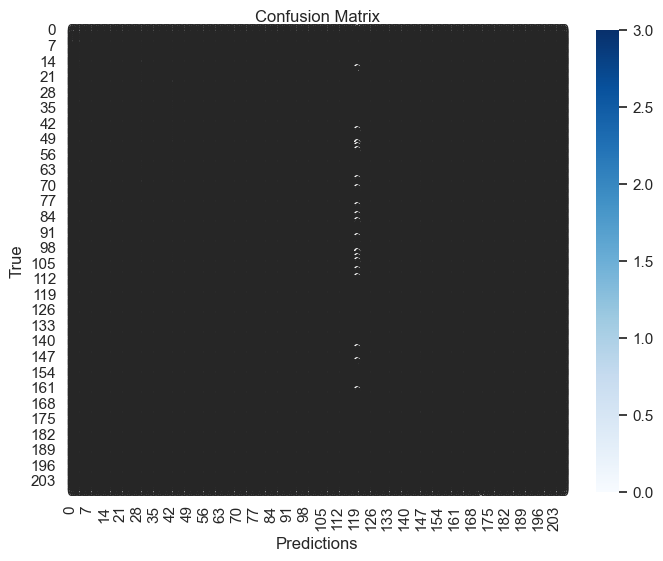

In [58]:
cm = confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predictions')
plt.show()

In [59]:
#recall = recall_score(y_test, predictions_test)
#print(f'Recall del modelo en el conjunto de prueba: {recall:.2f}')

In [60]:
#precision = precision_score(y_test, predictions_test)
#print(f'Precision del modelo en el conjunto de prueba: {precision:.2f}')

In [61]:
X_train.head()

,Inches,Ram,OS,Weight,GPU_model,CPU_freq,CPU_model,PrimaryStorage
244,13.9,8,5,1.38,55,2.7,62,256
991,15.6,4,5,2.10,77,2.0,36,128
1018,14.0,8,5,1.47,49,2.3,41,256
446,15.6,4,2,2.40,55,2.5,46,500
131,15.6,4,5,2.20,95,2.0,36,1024


4.4 Random Forest Classifier

In [63]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
#rfc = RandomForestClassifier(class_weight='balanced')

#param_grid = {
#    'n_estimators': [5,10,50],
#    'max_depth': [None,5,10],
#    'max_features': ['sqrt','log2',None],
#    'random_state': [0,30]
#}

#grid_search = GridSearchCV(rfc, param_grid, cv=5)
#grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)

4.5 XGBoost Regression

In [64]:
y = np.log(df_copy['Price_euros'])
X = df_copy[['Inches', 'Ram', 'OS', 'Weight',
       'GPU_model',
       'CPU_freq', 'CPU_model',
       'PrimaryStorage','Price_euros']]

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, 
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 9)
(383, 9)
(892,)
(383,)


In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
xgb = XGBRegressor()

param_grid = {
    'n_estimators': [5,10,50,100,200],
    'max_depth': [None,3,5,7],
    'learning_rate': [0.1,0.01,0.0001],
    'gamma': [0,0.1,0.2]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}


In [68]:
xgb = XGBRegressor(gamma=0, learning_rate=0.1,max_depth=None,n_estimators=100)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("R_cuadrado: ",r2_score(y_test,y_pred))

R_cuadrado:  0.9990337695617568


In [70]:
xgb_df3,xgb_res2 = model_res(xgb,X_train,X_test, y_train,y_test,y_pred,'XGB_mse')
xgb_df3

,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
XGB_mse,0.999972,0.999034,0.000367,0.019147,0.006155


In [71]:
## testing model yo see what is the prices if I send it random values
import math
sample_data = np.array([[15.6,	32,	2,4,22,45,5,6,9]])  
predicted_class = xgb.predict(sample_data)
print("Price Predictions for random numbers:")
print(math.exp(predicted_class))

Price Predictions for random numbers:
5504.8784493746125


In [72]:
actual_ypred_rf1 = y_pred    
res_df = pd.DataFrame({'Actual_y_test': y_test,'Pred':actual_ypred_rf1})
res_df.sample(20)

,Actual_y_test,Pred
384,7.466742,7.456350
1030,6.880384,6.873245
516,6.256652,6.258365
329,7.878155,7.866150
147,5.840642,5.845509
778,7.972121,7.991147
346,5.631212,5.617371
468,7.437795,7.443844
161,6.690842,6.682461
988,6.618739,6.615846
